In [50]:
#imports relevant libraries for task
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts/')))

In [53]:
# diplaying maximum column size
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:.2f}".format

# Task 1: User Overview Analysis

In [54]:
#read the cleaned telecom data
cleaned_df = pd.read_csv('../data/cleaned_Telecom_data.csv')

In [56]:
# declare functions for processing each task!
def get_top_handsets(num):
        top_handset = cleaned_df['Handset Type'].value_counts().head(num)
        return top_handset
    
def get_top_manufacturers(num):
        top_handset = cleaned_df['Handset Manufacturer'].value_counts().head(num)
        return top_handset
    
def get_handset_group():
        top_3_manufacturers = get_top_manufacturers(3)

        manufacturers = cleaned_df.groupby("Handset Manufacturer")

        for column in top_3_manufacturers.index:
            result = manufacturers.get_group(column).groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)
            print(f">>>> { column } <<<<")
            print(result)
            print() 

Identify the top 10 handsets used by the customers

In [57]:
top_10_handsets = get_top_handsets(10)
pd.DataFrame(top_10_handsets)

,Handset Type
Huawei B528S-23A,19754
Apple iPhone 6S (A1688),9401
Apple iPhone 6 (A1586),9004
undefined,8960
Apple iPhone 7 (A1778),6301
Apple iPhone Se (A1723),5176
Apple iPhone 8 (A1905),4985
Apple iPhone Xr (A2105),4562
Samsung Galaxy S8 (Sm-G950F),4504
Apple iPhone X (A1901),3809


In [58]:
top_10_handsets.index

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

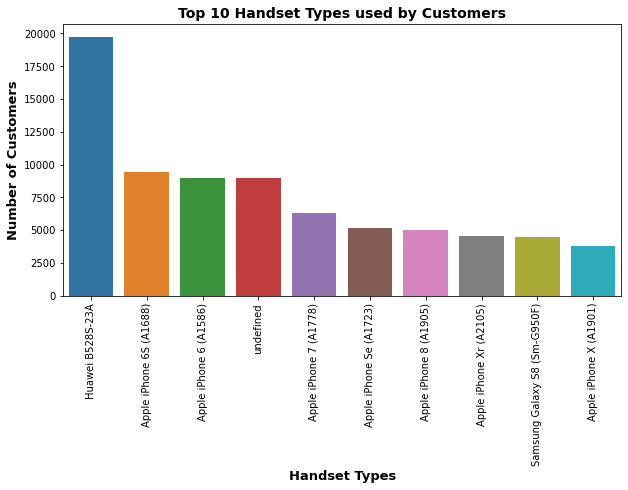

In [60]:
# Bar graph for top 10 handsets used by the customers
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values)
plt.title('Top 10 Handset Types used by Customers', size=14, fontweight="bold")
plt.xlabel('Handset Types', size=13, fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel('Number of Customers', size=13, fontweight="bold")
plt.show()

In [61]:
# top 3 manufactures used by customers from cleaned_df

top_3_manufacturers = get_top_manufacturers(3)
pd.DataFrame(top_3_manufacturers)

,Handset Manufacturer
Apple,59442
Samsung,40689
Huawei,34353


In [62]:
# Bar graph to display the top 3 Handset Manufacturers

plt.figure(figsize=(9,5))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values)
plt.title('Top 3 Handset Manufacturers', size=14, fontweight="bold")
plt.xlabel('Handset Manufacturers', size=13, fontweight="bold") 
plt.ylabel('Number of Users', size=13, fontweight="bold")
plt.show()

ValueError: If using all scalar values, you must pass an index